# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import requests
import json
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "./output_data/cities.csv"
output_data_file = "citiesA.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
This is achieved using citipy to find the name of the nearest city based on latitude and longitude.  First a set of randm latitude and longitude values are generated.  Looping through those values identifies the nearest city using citipy and if the city is not already in the list of cities it is added. The result is a list of random city names. 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)  #cities is a list of city names

# Print the city count to confirm sufficient count
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# set up dataframe column names
column_names = ['City','Cloudiness','Country',
                'Date','Humidity','Lat','Lng',
                'Max Temp','Wind Speed']

# Create an empty list to populate with weather data
weather = []

# Print a banner
print('Beginning Data Retrieval')
print("------------------------------")

# Loop over the list of cities and request data from openweather
for i in range(0, len(cities)):
    # Set up the url for the city to query
    url="http://api.openweathermap.org/data/2.5/weather?q="+cities[i]+"&units=imperial&appid=283a9319d8bc008a581bb0b88d702293"
    #print(url)
    
    try: 
        # Make the request call and jsonify it all in one step
        response = requests.get(url).json()
        # Print a progress report to the screen
        print("Processing Record \033[36m {0}\033[0m of Set \033[36m {1} \033[0m | {2}".format(i, i, cities[i]))
        # append the call data to the weather list
        weather.append([response['name'], response['clouds']['all'], 
                    response['sys']['country'], 
                    response['dt'], response['main']['humidity'], response['coord']['lat'], 
                    response['coord']['lon'], response['main']['temp_max'], 
                    response['wind']['speed']])
    except:
        # If the city is not found just skip it and process the next city 
        print('City \033[1m not \033[0m found. Skipping...')

# Create a dataframe with the weather data
df = pd.DataFrame(weather, columns=column_names)
df


Beginning Data Retrieval
------------------------------
Processing Record  0 of Set  0  | mys shmidta
City  not  found. Skipping...
Processing Record  1 of Set  1  | nizhneyansk
City  not  found. Skipping...
Processing Record  2 of Set  2  | rio grande
Processing Record  3 of Set  3  | ler
Processing Record  4 of Set  4  | taolanaro
City  not  found. Skipping...
Processing Record  5 of Set  5  | hobart
Processing Record  6 of Set  6  | aksarka
Processing Record  7 of Set  7  | atuona
Processing Record  8 of Set  8  | port elizabeth
Processing Record  9 of Set  9  | amderma
City  not  found. Skipping...
Processing Record  10 of Set  10  | hermanus
Processing Record  11 of Set  11  | ponta delgada
Processing Record  12 of Set  12  | mataura
Processing Record  13 of Set  13  | thompson
Processing Record  14 of Set  14  | busselton
Processing Record  15 of Set  15  | butaritari
Processing Record  16 of Set  16  | mar del plata
Processing Record  17 of Set  17  | rikitea
Processing Record  

Processing Record  120 of Set  120  | chuy
Processing Record  121 of Set  121  | yelizovo
Processing Record  122 of Set  122  | vaxjo
Processing Record  123 of Set  123  | viby
Processing Record  124 of Set  124  | kazalinsk
City  not  found. Skipping...
Processing Record  125 of Set  125  | mehamn
Processing Record  126 of Set  126  | yasnyy
Processing Record  127 of Set  127  | saskylakh
Processing Record  128 of Set  128  | hofn
Processing Record  129 of Set  129  | raudeberg
Processing Record  130 of Set  130  | khatanga
Processing Record  131 of Set  131  | mahebourg
Processing Record  132 of Set  132  | larap
Processing Record  133 of Set  133  | husavik
Processing Record  134 of Set  134  | lompoc
Processing Record  135 of Set  135  | lebu
Processing Record  136 of Set  136  | bundaberg
Processing Record  137 of Set  137  | camacha
Processing Record  138 of Set  138  | grand-lahou
Processing Record  139 of Set  139  | souillac
Processing Record  140 of Set  140  | oranjemund
Pro

Processing Record  240 of Set  240  | buariki
City  not  found. Skipping...
Processing Record  241 of Set  241  | hawkesbury
Processing Record  242 of Set  242  | santa marta
Processing Record  243 of Set  243  | provideniya
Processing Record  244 of Set  244  | ginir
Processing Record  245 of Set  245  | oktyabrskoye
Processing Record  246 of Set  246  | buchanan
Processing Record  247 of Set  247  | severo-kurilsk
Processing Record  248 of Set  248  | ampanihy
Processing Record  249 of Set  249  | huntsville
Processing Record  250 of Set  250  | belushya guba
City  not  found. Skipping...
Processing Record  251 of Set  251  | te anau
Processing Record  252 of Set  252  | nola
Processing Record  253 of Set  253  | nybro
Processing Record  254 of Set  254  | ust-nera
Processing Record  255 of Set  255  | cheremshanka
Processing Record  256 of Set  256  | staryy nadym
Processing Record  257 of Set  257  | angoram
Processing Record  258 of Set  258  | hithadhoo
Processing Record  259 of 

Processing Record  359 of Set  359  | yala
Processing Record  360 of Set  360  | alugan
Processing Record  361 of Set  361  | laguna
Processing Record  362 of Set  362  | parral
Processing Record  363 of Set  363  | puerto colombia
Processing Record  364 of Set  364  | borovoy
Processing Record  365 of Set  365  | cockburn town
Processing Record  366 of Set  366  | severnoye
Processing Record  367 of Set  367  | portadown
Processing Record  368 of Set  368  | mashhad
Processing Record  369 of Set  369  | cururupu
Processing Record  370 of Set  370  | pevek
Processing Record  371 of Set  371  | windhoek
Processing Record  372 of Set  372  | northampton
Processing Record  373 of Set  373  | tucuman
Processing Record  374 of Set  374  | flinders
Processing Record  375 of Set  375  | hare bay
Processing Record  376 of Set  376  | baruun-urt
Processing Record  377 of Set  377  | erenhot
Processing Record  378 of Set  378  | isangel
Processing Record  379 of Set  379  | havre-saint-pierre
Pr

Processing Record  482 of Set  482  | olenino
Processing Record  483 of Set  483  | kaniama
Processing Record  484 of Set  484  | krasne
Processing Record  485 of Set  485  | touros
Processing Record  486 of Set  486  | ndago
Processing Record  487 of Set  487  | torbay
Processing Record  488 of Set  488  | east london
Processing Record  489 of Set  489  | vila velha
Processing Record  490 of Set  490  | valdez
Processing Record  491 of Set  491  | koumac
Processing Record  492 of Set  492  | spantov
Processing Record  493 of Set  493  | belomorsk
Processing Record  494 of Set  494  | bay roberts
Processing Record  495 of Set  495  | almeirim
Processing Record  496 of Set  496  | morondava
Processing Record  497 of Set  497  | kemin
Processing Record  498 of Set  498  | tuggurt
City  not  found. Skipping...
Processing Record  499 of Set  499  | voi
Processing Record  500 of Set  500  | berja
Processing Record  501 of Set  501  | port-de-paix
City  not  found. Skipping...
Processing Rec

Processing Record  603 of Set  603  | danville
Processing Record  604 of Set  604  | alyangula
Processing Record  605 of Set  605  | nalut
Processing Record  606 of Set  606  | juneau
Processing Record  607 of Set  607  | bolungarvik
City  not  found. Skipping...
Processing Record  608 of Set  608  | indramayu
Processing Record  609 of Set  609  | cienfuegos
Processing Record  610 of Set  610  | chinar
Processing Record  611 of Set  611  | zavyalovo
Processing Record  612 of Set  612  | tiarei
Processing Record  613 of Set  613  | lonevag


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rio Grande,20,BR,1584114963,66,-32.03,-52.10,86.00,9.17
1,Leer,99,SS,1584115065,35,8.30,30.14,91.67,3.76
2,Hobart,9,AU,1584115023,63,-42.88,147.33,48.20,17.22
3,Aksarka,100,RU,1584115065,94,66.56,67.80,34.25,22.57
4,Atuona,95,PF,1584115029,68,-9.80,-139.03,81.77,11.50
...,...,...,...,...,...,...,...,...,...
552,Cienfuegos,40,CU,1584115171,61,22.15,-80.44,80.60,10.29
553,Chinar,0,RU,1584115171,70,42.11,48.14,49.91,6.13
554,Zavyalovo,41,RU,1584115172,62,54.51,82.45,24.80,4.47
555,Tiarei,25,PF,1584115086,83,-17.53,-149.33,77.00,4.70


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Save the city data into a CSV file
df.to_csv (output_data_file, header=True)

# display the dataframe
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rio Grande,20,BR,1584114963,66,-32.03,-52.10,86.00,9.17
1,Leer,99,SS,1584115065,35,8.30,30.14,91.67,3.76
2,Hobart,9,AU,1584115023,63,-42.88,147.33,48.20,17.22
3,Aksarka,100,RU,1584115065,94,66.56,67.80,34.25,22.57
4,Atuona,95,PF,1584115029,68,-9.80,-139.03,81.77,11.50
...,...,...,...,...,...,...,...,...,...
552,Cienfuegos,40,CU,1584115171,61,22.15,-80.44,80.60,10.29
553,Chinar,0,RU,1584115171,70,42.11,48.14,49.91,6.13
554,Zavyalovo,41,RU,1584115172,62,54.51,82.45,24.80,4.47
555,Tiarei,25,PF,1584115086,83,-17.53,-149.33,77.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
# A function to correctly label plots

def label_plot(plt,plot_title, x_axis, y_axis):
    plt.set_title(plot_title)
    plt.set_xlabel(x_axis)
    plt.set_ylabel(y_axis)
    

#### Latitude vs. Temperature Plot

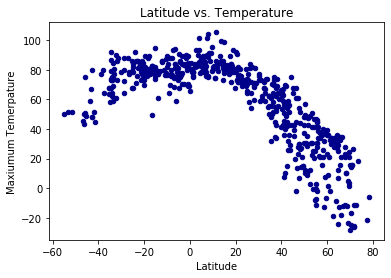

In [6]:
ax1 = df.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Temperature', "Latitude", "Maxiumum Temerpature")
plt.savefig('LatVTemp.png')
plt.show()

#### Latitude vs Temperature: Observation
Temperatures tend to increase closer to the equator (latitude 0) then fall off by distance either to the north or south. 

#### Latitude vs. Humidity Plot

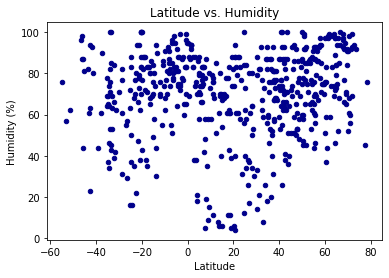

In [7]:
ax1 = df.plot.scatter(x='Lat',
                      y='Humidity',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Humidity', "Latitude", "Humidity (%)")
plt.savefig('LatVHumid.png')
plt.show()

#### Latitude vs Humidity: Observation


#### Latitude vs. Cloudiness Plot

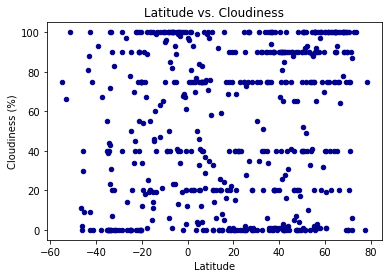

In [8]:
ax1 = df.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Cloudiness', "Latitude", "Cloudiness (%)")
plt.savefig('LatVCloud.png')
plt.show()

#### Latitude vs Cloudiness: Observation


#### Latitude vs. Wind Speed Plot

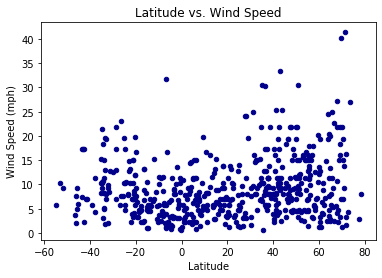

In [9]:
ax1 = df.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Wind Speed', "Latitude", "Wind Speed (mph)")
plt.savefig('LatVWind.png')
plt.show()

#### Latitude vs Windspeed: Observation


## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimenn
# Use sci pi to the the pearson r measure of correlation (r value)

def plot_linear_regression(x_values, y_values, x_label, y_label):    
    # Do a line regression on x and y values to calculate values for the line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Longer print message - can uncomment if would prefer longer message
#     print('The correlation between ' + x_label + 
#       '\033[1m and \033[0m' +
#       'the ' + y_label +
#       '\033[1m is \033[0m' + 
#        f'\033[36m {rvalue:2.2f} \033[0m')
    
    print('The r-squared' + '\033[1m is \033[0m' + f'\033[36m {rvalue:2.6f} \033[0m')

    # Create a scatter plot of weight versus average tumor volume
    plt.scatter(x_values,y_values)
    
    # Add a red line to indicate the correlation
    plt.plot(x_values,regress_values,"r-")
    
    # Create labels for the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(x_label+" Versus "+ y_label)

    # Show the plot
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat'] >= 0]    #greater than or equal to 0 degrees latitude
southern_df = df[df['Lat'] <  0]   #less than 0 degrees latitude

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rio Grande,20,BR,1584114963,66,-32.03,-52.10,86.00,9.17
2,Hobart,9,AU,1584115023,63,-42.88,147.33,48.20,17.22
4,Atuona,95,PF,1584115029,68,-9.80,-139.03,81.77,11.50
5,Port Elizabeth,43,ZA,1584115066,76,-33.92,25.57,73.31,8.21
6,Hermanus,0,ZA,1584115066,74,-34.42,19.23,73.99,3.00
...,...,...,...,...,...,...,...,...,...
539,Ruteng,100,ID,1584115169,93,-8.61,120.47,69.53,4.43
541,Campo Maior,41,BR,1584115169,64,-4.83,-42.17,90.77,1.66
548,Alyangula,99,AU,1584115170,94,-13.85,136.42,77.00,4.43
551,Indramayu,100,ID,1584114977,77,-6.33,108.32,81.23,1.77


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is  -0.871691 


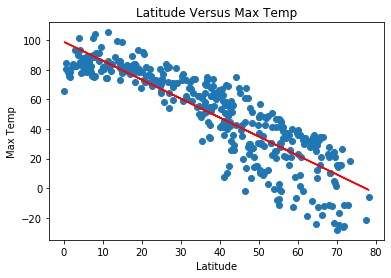

In [28]:
# Call the linear regression functino
plot_linear_regression(northern_df['Lat'], northern_df['Max Temp'], "Latitude", "Max Temp")

##### Northern Hemisphere - Max Temp vs. Latitude Linear Regression: Obervation

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is  0.527330 


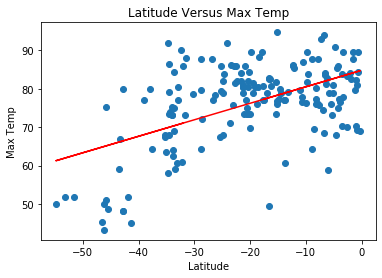

In [21]:
plot_linear_regression(southern_df['Lat'], southern_df['Max Temp'], "Latitude",  "Max Temp")

##### Southern Hemisphere - Max Temp vs. Latitude Observation

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is  0.261153 


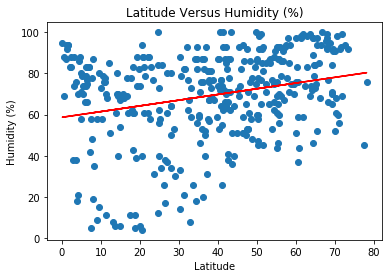

In [22]:
plot_linear_regression(northern_df['Lat'], northern_df['Humidity'], "Latitude",  "Humidity (%)")

#####  Northern Hemisphere - Humidity (%) vs. Latitude Observation

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is  0.250284 


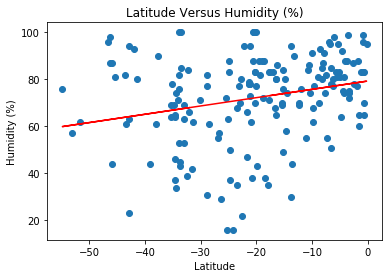

In [23]:
plot_linear_regression(southern_df['Lat'], southern_df['Humidity'], "Latitude", "Humidity (%)")

#####  Southern Hemisphere - Humidity (%) vs. Latitude Observation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is  0.201602 


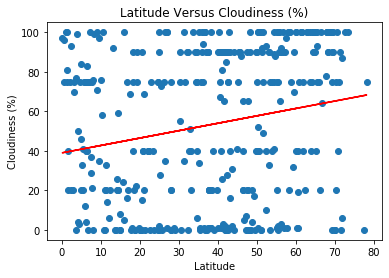

In [24]:
plot_linear_regression(northern_df['Lat'], northern_df['Cloudiness'], "Latitude", "Cloudiness (%)")

#####  Northern Hemisphere - Cloudiness vs. Latitude Observation

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is  0.258199 


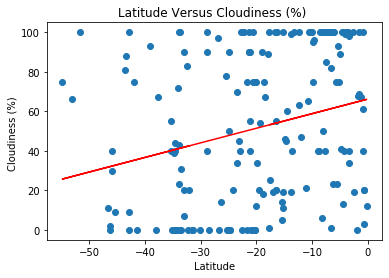

In [25]:
plot_linear_regression(southern_df['Lat'], southern_df['Cloudiness'], "Latitude", "Cloudiness (%) ")

#####  Southern Hemisphere - Cloudiness vs. Latitude Observation

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is  0.256951 


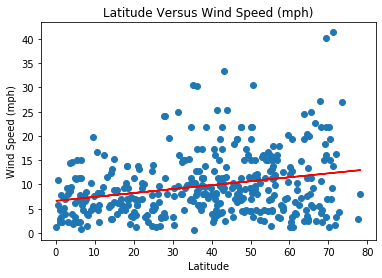

In [26]:
plot_linear_regression(northern_df['Lat'], northern_df['Wind Speed'], "Latitude" , "Wind Speed (mph)")

#####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Observation

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is  -0.268228 


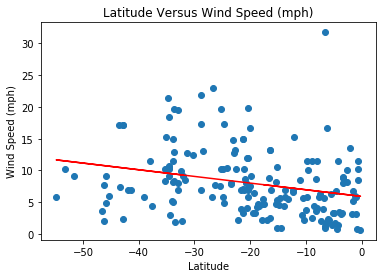

In [27]:
plot_linear_regression( southern_df['Lat'], southern_df['Wind Speed'], "Latitude", "Wind Speed (mph)")

#####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Observation

# End of Notebook 